In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv("bestsellers with categories.csv")
df.head(5)
df.shape

(550, 7)

Відповідь: Про скільки книг зберігає дані датасет?

In [2]:
print(f"Датасет містить дані про {df['Name'].count()} книги")

Датасет містить дані про 550 книги


In [3]:
df.columns = ["name", "author", "user_raiting", "reviews", "price", "year", "genre"]

# Первинне дослідження даних

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [4]:
df.isna().sum()

name            0
author          0
user_raiting    0
reviews         0
price           0
year            0
genre           0
dtype: int64

**Відповідь: Чи є в якихось змінних пропуски? (Так / ні)**

ні

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [5]:
df["genre"].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

**Відповідь: Які є унікальні жанри?**

Таблиця містить: Non Fiction, Fiction

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

Text(0, 0.5, 'кількість книг')

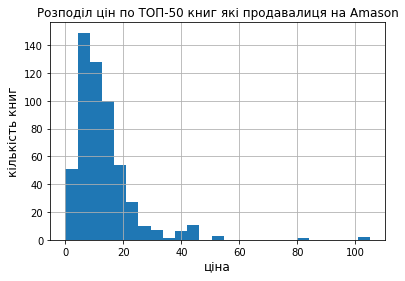

In [6]:
hist = df["price"].hist(bins=25)
plt.title("Розподіл цін по ТОП-50 книг які продавалиця на Amason")
plt.xlabel("ціна", fontsize="large")
plt.ylabel("кількість книг", fontsize="large")

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [7]:
df.agg({"price": ["min", "max", "mean", "median"]})

,price
min,0.0
max,105.0
mean,13.1
median,11.0


In [8]:
print(f"максимальна ціна - {df['price'].max()},\
    мінімальна ціна - {df['price'].min()},\
    середня ціна - {df['price'].mean()},\
    медіана цін - {df['price'].median()}")

максимальна ціна - 105,    мінімальна ціна - 0,    середня ціна - 13.1,    медіана цін - 11.0


# Пошук та сортування даних

Відповідь: Який рейтинг у датасеті найвищий? Відповідь:

In [9]:
df["user_raiting"].max()

4.9

Відповідь: Скільки книг мають такий рейтинг?

In [10]:
df[df["user_raiting"] == df["user_raiting"].max()].count()



name            52
author          52
user_raiting    52
reviews         52
price           52
year            52
genre           52
dtype: int64

In [11]:
print("52 книги мають найвщій рейтинг")

52 книги мають найвщій рейтинг


Відповідь: Яка книга має найбільше відгуків? 

In [12]:
df[df["reviews"] == df["reviews"].max()]

,name,author,user_raiting,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [13]:
df[df["year"] == 2015].sort_values(by=['price'], ascending=False).head(3)

,name,author,user_raiting,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction
501,Thug Kitchen: The Official Cookbook: Eat Like ...,Thug Kitchen,4.6,11128,23,2015,Non Fiction
132,Go Set a Watchman: A Novel,Harper Lee,3.6,14982,19,2015,Fiction


Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

In [14]:
df[(df.genre == 'Fiction') & (df.year == 2010)].count()[0]

20

Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? 

In [15]:
df[(df.user_raiting == 4.9) & ((df.year == 2010) | (df.year == 2011))].count()[0]

1

І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [16]:
df[(df["year"] == 2015) & (df["price"] < 8)].sort_values(by=['price'])

,name,author,user_raiting,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Відповідь: Яка книга остання у відсортованому списку?

In [17]:
df[(df["year"] == 2015) & (df["price"] < 8)].sort_values(by=['price']).tail(1)

,name,author,user_raiting,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


#Діаграми

Залежність кількості відгуків від ціни книги
з діаграми видно що залежність майже відсутня

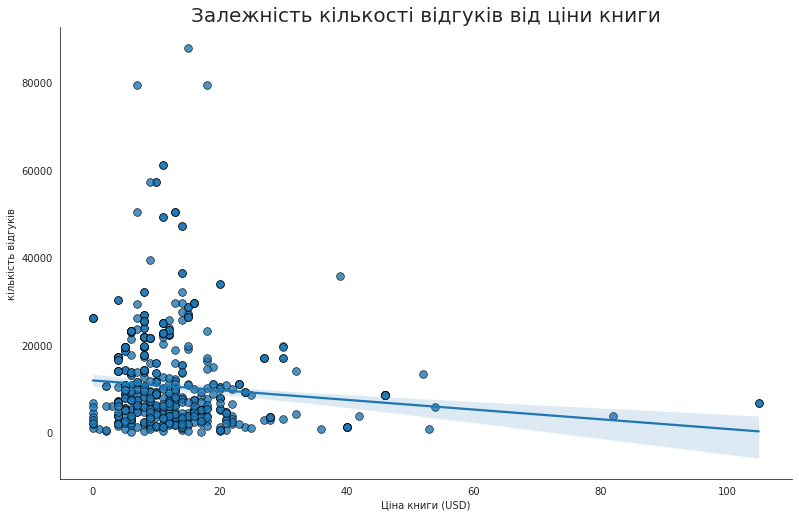

In [41]:
sns.set_style("white")


gridobj = sns.lmplot(x="Price", y="Reviews", data=df,
                    height=7, aspect=1.6, robust=True, palette='tab10', 
                    scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.xlabel("Ціна книги (USD)")
plt.ylabel("кількість відгуків")
plt.title("Залежність кількості відгуків від ціни книги", fontsize=20)
plt.show()

Деревовидна карта. Візуалізація рейтингу книг

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


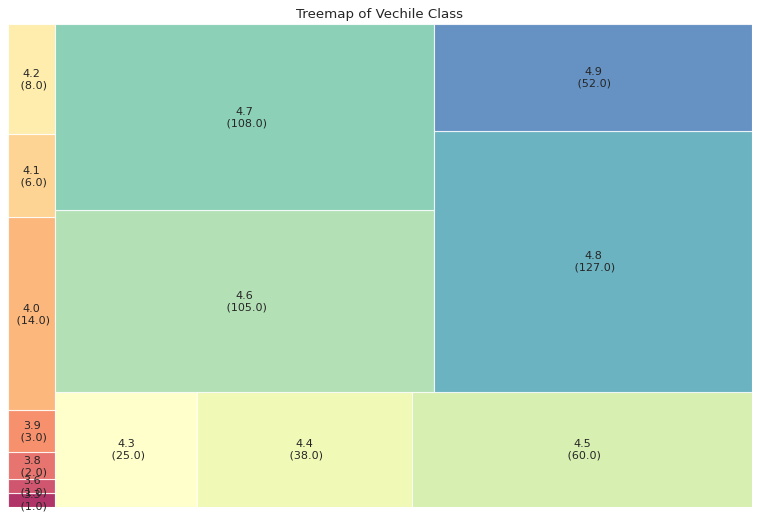

In [44]:
!pip install squarify
import squarify 

# Prepare Data
df_prepared = df.groupby('User Rating').size().reset_index(name='counts')
labels = df_prepared.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_prepared['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Деревоподібна карта рейтингу книг')
plt.axis('off')
plt.show()


Кількість книжок з відповідним рейтингом в розрізі років

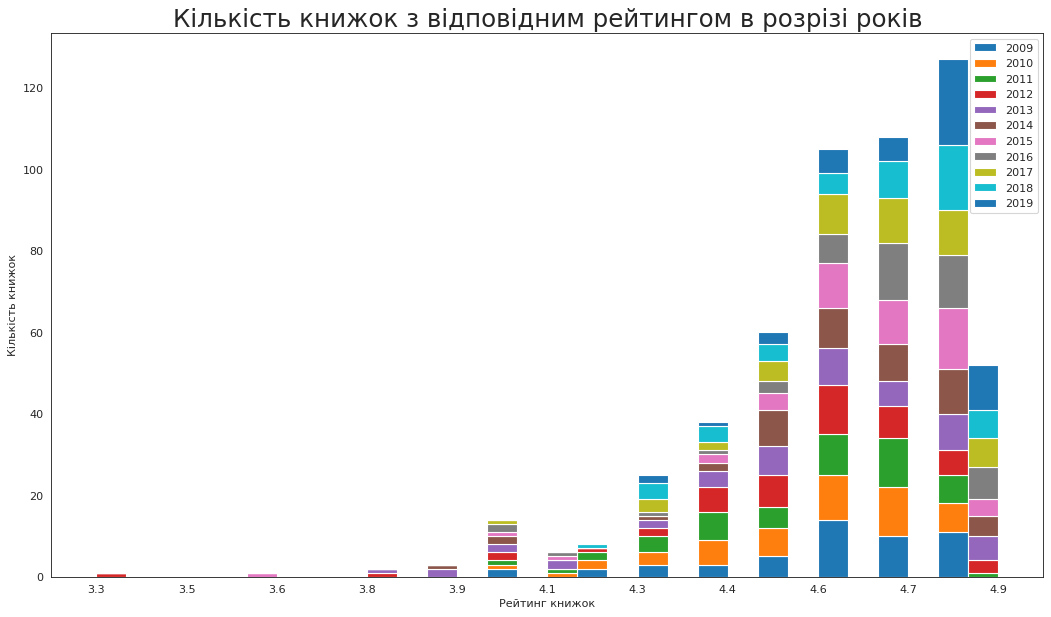

In [56]:
x_var = 'User Rating'
groupby_var = 'Year'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

plt.figure(figsize=(16,9), dpi= 80)

n, bins, patches = plt.hist(vals, 30, stacked=True, density=False)


plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title("Кількість книжок з відповідним рейтингом в розрізі років", fontsize=22)
plt.xlabel("Рейтинг книжок")
plt.ylabel("Кількість книжок")
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

# Агрегування даних та з'єднання таблиць

Давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [18]:
df.groupby("genre").agg({"price": ["max", "min"]})

price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0

Відповідь: Максимальна ціна для жанру Fiction: ***Відповідь 82***

Відповідь: Мінімальна ціна для жанру Fiction: ***Відповідь 0***

Відповідь: Максимальна ціна для жанру Non Fiction: ***Відповідь 105***

Відповідь: Мінімальна ціна для жанру Non Fiction: ***Відповідь 0***

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [19]:
df_author = df.groupby("author")["author"].agg("count").reset_index(name="counts")

Відповідь: Якої розмірності вийшла таблиця? Відповідь:


In [20]:
df_author.shape

(248, 2)

Відповідь: Який автор має найбільше книг? Відповідь:

In [21]:
df_author.author[df_author.counts == df_author.counts.max()]

120    Jeff Kinney
Name: author, dtype: object

Відповідь: Скільки книг цього автора? Відповідь:

In [22]:
df_author.counts[df_author.counts == df_author.counts.max()]

120    12
Name: counts, dtype: int64

Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [23]:
df_author_raiting = df.groupby("author")["user_raiting"].agg("mean").reset_index(name="raiting")


Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:

In [24]:
df_author_raiting.author[df_author_raiting.raiting == df_author_raiting.raiting.min()]

71    Donna Tartt
Name: author, dtype: object

Відповідь: Який у цього автора середній рейтинг? Відповідь:

In [25]:
df_author_raiting.raiting[df_author_raiting.raiting == df_author_raiting.raiting.min()]

71    3.9
Name: raiting, dtype: float64

З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [26]:
new_df = pd.concat([df_author.set_index('author'), df_author_raiting.set_index('author')], axis=1)
new_df.head()

,counts,raiting
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [27]:
new_df.sort_values(by=['counts', 'raiting'])

,counts,raiting
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Відповідь: Який автор перший у списку?

In [28]:
new_df.sort_values(by=['counts', 'raiting']).head(1)

,counts,raiting
author,,
Muriel Barbery,1,4.0
